# Dolphin Social Network


An **undirected social network** of frequent associations observed among **62 dolphins** (Tursiops) in a community living off Doubtful Sound, New Zealand, from 1994-2001.

In [47]:
#Import Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Data Extraction (GML -> Graph Modeling Languange)

In [50]:
G = nx.read_gml("dolphins.gml")

In [51]:
G.number_of_nodes()

62

In [52]:
G.number_of_edges()

159

In [53]:
# Inspect first few nodes
list(G.nodes(data=True))[:5]

[('Beak', {}), ('Beescratch', {}), ('Bumper', {}), ('CCL', {}), ('Cross', {})]

## Compute Degree

In [54]:
degrees = dict(G.degree())

In [55]:
top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

#### Top dolphins by degree

In [56]:
top_nodes

[('Grin', 12), ('SN4', 11), ('Topless', 11), ('Scabs', 10), ('Trigger', 10)]

## Leaders vs Non-Leaders


A **leader** is a node (user) that has high influence or centrality in the network while a **non-leader** is a node (user) that is less connected or peripheral in the network.

In [57]:
degree_values = np.array(list(degrees.values()))
threshold_top = np.percentile(degree_values, 90)
threshold_bottom = np.percentile(degree_values, 10)

leaders = [node for node, deg in degrees.items() if deg >= threshold_top]
non_leaders = [node for node, deg in degrees.items() if deg <= threshold_bottom]

print("Leaders:", leaders)
print("Non-leaders:", non_leaders)

Leaders: ['Grin', 'Jet', 'Kringel', 'Patchback', 'Scabs', 'SN4', 'Topless', 'Trigger', 'Web']
Non-leaders: ['Cross', 'Five', 'Fork', 'MN23', 'Quasi', 'SMN5', 'TR82', 'Whitetip', 'Zig']


## Shortest Path

In [58]:
source_node = list(G.nodes())[0]
target_node = leaders[0]

path = nx.shortest_path(G, source=source_node, target=target_node)
length = nx.shortest_path_length(G, source=source_node, target=target_node)

print(f"Shortest path from {source_node} to {target_node}: {path}, length={length}")


Shortest path from Beak to Grin: ['Beak', 'Grin'], length=1


## Graph Visualization

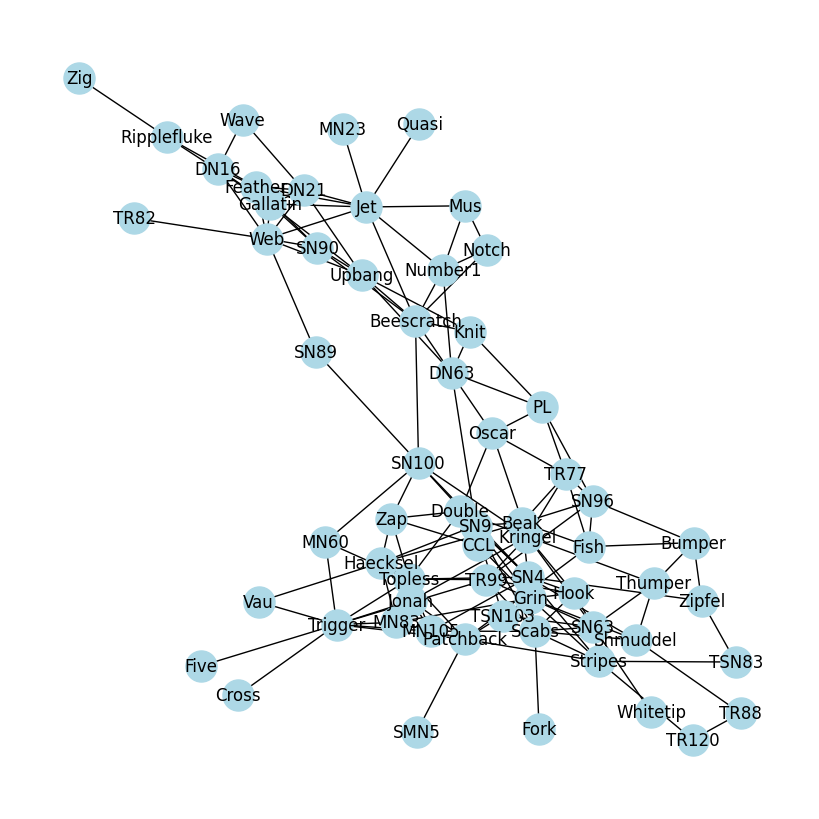

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)
plt.show()